# Packages

In [1]:
!pip install openai==0.28.1

In [2]:
!pip install mrtparse

In [3]:
!pip install neo4j

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os

import random
import pickle
import openai

# Define Graph

In [5]:
### Defining the graph

no_of_nodes = 10 ## Number of nodes
prob_edge = 0.25 ## Probability of edge creation (Increase it if you want more)
seed = 123

G = nx.fast_gnp_random_graph(n=no_of_nodes,
                             p=prob_edge,
                             directed=True,
                             seed=seed)


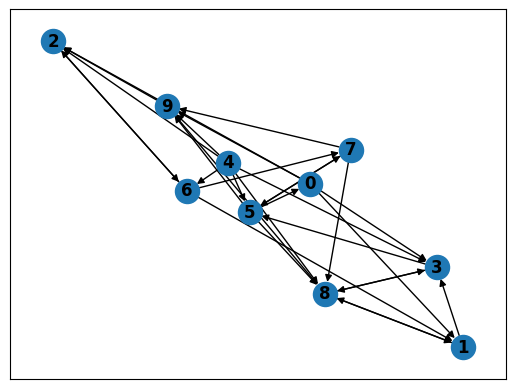

In [6]:
nx.draw_networkx(G, with_labels=True, font_weight='bold')

### Creating the list of graphs

In [7]:

node_list = [5,10,15,20,25] ## List of possible number of nodes
no_of_graphs = 4 ## Number of graphs to be generated
graph_list = []

for i in range(no_of_graphs):
    curr_node_number = random.choice(node_list)

    prob_edge = 0.2 # Probability of edge creation (Increase it if you want more edges)
    curr_G = nx.fast_gnp_random_graph(n=curr_node_number,
                             p=prob_edge,
                             directed=True,
                             seed=seed)
    graph_list.append(curr_G)


The above will generate a different set of graphs each time. Save the list as a pickle file, if you want to access a set of graphs again

In [8]:
curr_file_name = "initial_file.pkl"

with open(curr_file_name, 'wb') as f:
    pickle.dump(graph_list, f)

In [9]:
#### Run this block to load a pickle file

curr_file_name = "initial_file.pkl"

with open(curr_file_name, 'rb') as f:
    graph_list = pickle.load(f)

# Prompt Generation

### a) Describing a graph

In [10]:
## Describing a graph

def describe_graph(curr_graph,curr_num):

    """
    Function to describe a graph with nodes and edges

    input:
    curr_graph : A graph object
    curr_num : Integer to describe the graph

    output:
    graph_desc: A string object with description about the graph
    """


    graph_desc = """"""

    nodes = list(curr_graph.nodes())
    edges = list(curr_graph.edges())

    nodes = [str(each_node) for each_node in nodes]
    edges = [(str(curr_edge[0]) + " CONNECTS " + str(curr_edge[1])) for curr_edge in edges]

    graph_desc = graph_desc + """
    Graph {} has nodes {}
    and the edges are described as follows

    {}
    """.format(str(curr_num),','.join(nodes),'\n  '.join(edges))

    return graph_desc

### b) In degree and Out degree

In [11]:
def describe_indegree(curr_graph):

    indegree_desc = """
    The indegree of a node is the number of incoming arcs to a node. The indegree of the nodes in this graph are as follows
    """

    nodes = list(curr_graph.nodes())
    edges = list(curr_graph.edges())

    nodes_str = [str(each_node) for each_node in nodes]

    for k in range(len(nodes)):

        curr_node_str = nodes_str[k]
        curr_node = nodes[k]

        curr_indegree = curr_graph.in_degree(curr_node)

        indegree_desc = indegree_desc + """
        Indegree of node {} is {}""".format(curr_node_str, str(curr_indegree))

    return indegree_desc

In [12]:
def describe_outdegree(curr_graph):

    outdegree_desc = """
    The outdegree of a node is the number of outgoing arcs from a node. The outdegree of the nodes in this graph are as follows
    """

    nodes = list(curr_graph.nodes())
    edges = list(curr_graph.edges())

    nodes_str = [str(each_node) for each_node in nodes]

    for k in range(len(nodes)):

        curr_node_str = nodes_str[k]
        curr_node = nodes[k]

        curr_outdegree = curr_graph.out_degree(curr_node)

        outdegree_desc = outdegree_desc + """
        Outdegree of node {} is {}""".format(curr_node_str, str(curr_outdegree))

    return outdegree_desc

In [13]:
## To generate prompts for indegree
graph_desc_indegree = """"""
i = 0

for each_graph in graph_list:
    graph_desc_indegree = graph_desc_indegree + describe_graph(each_graph,i) + "What is the indegree of each node in the graph?\n" + describe_indegree(each_graph) + "\n"
    i+=1

print(graph_desc_indegree)



    Graph 0 has nodes 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
    and the edges are described as follows

    0 CONNECTS 1
  0 CONNECTS 2
  0 CONNECTS 7
  0 CONNECTS 11
  0 CONNECTS 12
  0 CONNECTS 14
  1 CONNECTS 3
  1 CONNECTS 6
  1 CONNECTS 9
  1 CONNECTS 12
  2 CONNECTS 3
  2 CONNECTS 6
  2 CONNECTS 7
  2 CONNECTS 12
  2 CONNECTS 14
  2 CONNECTS 0
  3 CONNECTS 9
  4 CONNECTS 8
  4 CONNECTS 9
  4 CONNECTS 10
  4 CONNECTS 3
  5 CONNECTS 8
  5 CONNECTS 10
  5 CONNECTS 1
  6 CONNECTS 1
  6 CONNECTS 5
  7 CONNECTS 8
  7 CONNECTS 9
  7 CONNECTS 10
  8 CONNECTS 9
  8 CONNECTS 0
  8 CONNECTS 2
  8 CONNECTS 5
  9 CONNECTS 12
  9 CONNECTS 13
  9 CONNECTS 4
  9 CONNECTS 8
  10 CONNECTS 12
  10 CONNECTS 5
  11 CONNECTS 14
  11 CONNECTS 0
  11 CONNECTS 5
  12 CONNECTS 4
  12 CONNECTS 7
  13 CONNECTS 0
  13 CONNECTS 3
  13 CONNECTS 4
  13 CONNECTS 11
  13 CONNECTS 12
  14 CONNECTS 7
    What is the indegree of each node in the graph?

    The indegree of a node is the number of incoming arcs to a no

In [14]:
## To generate prompts for indegree
graph_desc_outdegree = """"""
i = 0

for each_graph in graph_list:
    graph_desc_outdegree = graph_desc_outdegree + describe_graph(each_graph,i) + "What is the outdegree of each node in the graph?\n" + describe_outdegree(each_graph) + "\n"
    i+=1

print(graph_desc_outdegree)


    Graph 0 has nodes 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
    and the edges are described as follows

    0 CONNECTS 1
  0 CONNECTS 2
  0 CONNECTS 7
  0 CONNECTS 11
  0 CONNECTS 12
  0 CONNECTS 14
  1 CONNECTS 3
  1 CONNECTS 6
  1 CONNECTS 9
  1 CONNECTS 12
  2 CONNECTS 3
  2 CONNECTS 6
  2 CONNECTS 7
  2 CONNECTS 12
  2 CONNECTS 14
  2 CONNECTS 0
  3 CONNECTS 9
  4 CONNECTS 8
  4 CONNECTS 9
  4 CONNECTS 10
  4 CONNECTS 3
  5 CONNECTS 8
  5 CONNECTS 10
  5 CONNECTS 1
  6 CONNECTS 1
  6 CONNECTS 5
  7 CONNECTS 8
  7 CONNECTS 9
  7 CONNECTS 10
  8 CONNECTS 9
  8 CONNECTS 0
  8 CONNECTS 2
  8 CONNECTS 5
  9 CONNECTS 12
  9 CONNECTS 13
  9 CONNECTS 4
  9 CONNECTS 8
  10 CONNECTS 12
  10 CONNECTS 5
  11 CONNECTS 14
  11 CONNECTS 0
  11 CONNECTS 5
  12 CONNECTS 4
  12 CONNECTS 7
  13 CONNECTS 0
  13 CONNECTS 3
  13 CONNECTS 4
  13 CONNECTS 11
  13 CONNECTS 12
  14 CONNECTS 7
    What is the outdegree of each node in the graph?

    The outdegree of a node is the number of outgoing arcs from 

## c) Describe BGP graph

In [15]:
import json
import sys
from mrtparse import *
import networkx as nx
import matplotlib.pyplot as plt

import os
import requests
import gzip
import shutil
import openai

from neo4j import GraphDatabase

In [16]:
server_url = "https://data.ris.ripe.net"
rrc_name = "rrc00"
year = "2017"
month = "09"
date = "01"
time = "0800"

zip_file_name = "bview.{}{}{}.{}.gz".format(year,month,date,time)
filename = "bview.{}{}{}.{}".format(year,month,date,time)

remote_url = server_url + "/" + rrc_name + "/" + year + "." + month + "/" + zip_file_name
print(remote_url)

https://data.ris.ripe.net/rrc00/2017.09/bview.20170901.0800.gz


In [17]:
r = requests.get(remote_url, allow_redirects=True)

if(r.status_code==200):

    ## Removing the zip file if it exists
    if os.path.isfile(zip_file_name):
        os.remove(zip_file_name)

    ## Removing content file if it exists
    if os.path.isfile(filename):
        os.remove(filename)

    ## Obtaining the zip file
    with open(zip_file_name, 'wb') as f:
        f.write(r.content)

    ## Obtaining the content file
    with gzip.open(zip_file_name, 'rb') as f_in:
        with open(filename, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    ## Removing the zip file after extraction
    if os.path.isfile(zip_file_name):
        os.remove(zip_file_name)
else:
    print('File does not exist')

In [18]:
# Creating graph in networkx
#edge_connections = ""

G = nx.DiGraph()
node_check = []

i = 0
for entry in Reader(filename):

    curr_json = entry.data
    #check_json.append(curr_json)

    if list(curr_json['subtype'].values())[0]== "RIB_IPV4_UNICAST":

        if 'rib_entries' in curr_json.keys():

            entry_count = curr_json.get('entry_count',0)
            for j in range(entry_count):
                curr_list = curr_json['rib_entries'][j]['path_attributes'][1]['value'][0]['value']
                #check_list.append(curr_list)

                N = len(curr_list)
                for k in range(N-1):
                    if(curr_list[k+1]!=curr_list[k]): ## Avoiding same node cycles
                        G.add_edge(curr_list[k+1],curr_list[k])
                        node_check.append(curr_list[k+1])
                        node_check.append(curr_list[k])
        else:
            curr_list = curr_json['path_attributes'][1]['value'][0]['value']
            #check_list.append(curr_list)

            N = len(curr_list)
            for k in range(N-1):
                if(curr_list[k+1]!=curr_list[k]):
                    G.add_edge(curr_list[k+1],curr_list[k])
                    node_check.append(curr_list[k+1])
                    node_check.append(curr_list[k])


        i += 1

    if(i==20):
        break

#print(len(list(set(node_check))))

In [19]:
# Describing BGP graph in formatted string
formatted_string = ""
connect_list = []

i = 0
for entry in Reader(filename):

    curr_json = entry.data
    #check_json.append(curr_json)

    if list(curr_json['subtype'].values())[0]== "RIB_IPV4_UNICAST":

        if 'rib_entries' in curr_json.keys():

            entry_count = curr_json.get('entry_count',0)
            for j in range(entry_count):
                curr_list = curr_json['rib_entries'][j]['path_attributes'][1]['value'][0]['value']
                #check_list.append(curr_list)

                N = len(curr_list)
                for k in range(N-1):
                    if(curr_list[k+1]!=curr_list[k]): ## Avoiding same node cycles
                        connect_list.append(curr_list[k+1] + " CONNECTS " + curr_list[k])
                        #connect_list.append(curr_list[k+1] + " is connected to " + curr_list[k])
        else:
            curr_list = curr_json['path_attributes'][1]['value'][0]['value']
            #check_list.append(curr_list)

            N = len(curr_list)
            for k in range(N-1):
                if(curr_list[k+1]!=curr_list[k]):
                    connect_list.append(curr_list[k+1] + " CONNECTS " + curr_list[k])
                    #connect_list.append(curr_list[k+1] + " is connected to " + curr_list[k])


        i += 1

    if(i==20):
        break

connect_list = list(set(connect_list))
formatted_string = "\n".join(connect_list)
#print(formatted_string)

In [20]:
context = formatted_string

## Prompts for fine tuning

This prompt makes use of few shot learning, where the LLM is fed few examples of how an ideal graph should work.

In [21]:
curr_graph = graph_list[0]

curr_list = []

## System Prompt
system_prompt = """
You are an assistant that is an expert in graph operations that should memorize the inputs given initially without forgetting them. These
would contain information about a graph. Using the given information you should answer the questions that follow.
Do not add any additional information that is not explicitly provided in the latest prompt.
I repeat, do not add any information that is not explicitly given.
"""

curr_list.append({"role":"system","content":system_prompt})

## User prompt (Question)
user_prompt = describe_graph(curr_graph,0) + """
Instruction: What are the indegree of nodes in this graph?
"""
curr_list.append({"role":"user","content":user_prompt})

## Assistant prompt (Answer)
assistant_prompt = "Answer: " + describe_indegree(curr_graph)
curr_list.append({"role":"assistant","content":assistant_prompt})

overall_message = {"message":curr_list}

print(overall_message)

{'message': [{'role': 'system', 'content': '\nYou are an assistant that is an expert in graph operations that should memorize the inputs given initially without forgetting them. These\nwould contain information about a graph. Using the given information you should answer the questions that follow.\nDo not add any additional information that is not explicitly provided in the latest prompt.\nI repeat, do not add any information that is not explicitly given.\n'}, {'role': 'user', 'content': '\n    Graph 0 has nodes 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14\n    and the edges are described as follows\n\n    0 CONNECTS 1\n  0 CONNECTS 2\n  0 CONNECTS 7\n  0 CONNECTS 11\n  0 CONNECTS 12\n  0 CONNECTS 14\n  1 CONNECTS 3\n  1 CONNECTS 6\n  1 CONNECTS 9\n  1 CONNECTS 12\n  2 CONNECTS 3\n  2 CONNECTS 6\n  2 CONNECTS 7\n  2 CONNECTS 12\n  2 CONNECTS 14\n  2 CONNECTS 0\n  3 CONNECTS 9\n  4 CONNECTS 8\n  4 CONNECTS 9\n  4 CONNECTS 10\n  4 CONNECTS 3\n  5 CONNECTS 8\n  5 CONNECTS 10\n  5 CONNECTS 1\n  6 CO

In [22]:
def generate_user_prompt(question, context):
   return f"""
   The question is {question}
   Answer the question by using the provided information:
   {context}
   """

In [23]:
def get_gpt3_response(system_prompt, prompt, context, api_key, model="gpt-3.5-turbo"):
    """
    Send a request to the OpenAI Chat API and get a response from the model.

    Args:
        prompt (str): The user's question.
        context (str): Contextual information to be passed to the model.
        api_key (str): Your OpenAI API key.
        model (str): The model version to use, default is "gpt-3.5-turbo".

    Returns:
        str: The model's response.
    """

    # Create the full prompt by combining the system prompt, context, and the user question
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": generate_user_prompt(prompt, context)}
    ]

    # Use the OpenAI Python client to send the request
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages
    )

    # Extract the response text and return
    return response.choices[0].message['content']

# You will need to install the openai Python package to use this function and also have a valid API key.


In [24]:
# Define your API key (keep it secret!)
API_KEY = "#Enter API Key here"
openai.api_key = "#Enter API Key Here"

In [25]:
# Indegree of all nodes
question = "What is the indegree of all nodes in this graph?"
context_info = graph_desc_indegree + "\n" + context
system_prompt = system_prompt
response = get_gpt3_response(system_prompt, question, context_info, API_KEY, model = "gpt-3.5-turbo")
print(response)

The indegree of each node in the graph is as follows:

Indegree of node 10026 is 3
Indegree of node 4844 is 3


In [26]:
# Outdegree of all nodes
question = "What is the outdegree of all nodes?"
context_info = graph_desc_outdegree + "\n" + context
response = get_gpt3_response(system_prompt, question, context_info, API_KEY, model = "gpt-3.5-turbo")
print(response)

The outdegree of each node in the graph is as follows:

Outdegree of node 10026 is 2
Outdegree of node 4844 is 1
Outdegree


In [27]:
# Indegree of node 2516
question = "What is the indegree of node 2516 in this graph?"
context_info = graph_desc_indegree + "\n" + context
system_prompt = system_prompt
response = get_gpt3_response(system_prompt, question, context_info, API_KEY, model = "gpt-3.5-turbo")
print(response)

The indegree of each node in the graph is as follows:

Indegree of node 10026 is 3  
Indegree of node 4844 is


In [28]:
# Outdegree of node 2516
question = "What is the outdegree of node 2516 in this graph?"
context_info = graph_desc_outdegree + "\n" + context
system_prompt = system_prompt
response = get_gpt3_response(system_prompt, question, context_info, API_KEY, model = "gpt-3.5-turbo")
print(response)

The outdegree of node 2516 is 4.


In [29]:
# Indegree of node 2516
question = "What is the indegree of node 3333 in this graph? Show the steps involved."
context_info = graph_desc_indegree + "\n" + context
system_prompt = system_prompt
response = get_gpt3_response(system_prompt, question, context_info, API_KEY, model = "gpt-3.5-turbo")
print(response)

The indegree of node 3333 in the provided graph is 6.


In [30]:
# Outdegree of node 2516
question = "What is the outdegree of node 10026 in this graph? Show the steps involved."
context_info = graph_desc_outdegree + "\n" + context
system_prompt = system_prompt
response = get_gpt3_response(system_prompt, question, context_info, API_KEY, model = "gpt-3.5-turbo")
print(response)

To find the outdegree of a node, we need to count the number of outgoing arcs from that node. 

For the given question
